In [2]:
from __future__ import division

import gym
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import tensorflow.contrib.slim as slim

import trackpy as tp
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import scipy.misc
import os
%matplotlib inline


import cv2

In [72]:
import pdb
from time import sleep

import tensorflow.python.platform
from tensorflow.python.platform import gfile

from PIL import Image
import re

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelBinarizer

In [55]:
from piaget import Point, Mover, MoverTracker, FramePair, Box, Categorizer
from piaget import init_env, play

In [87]:
env = gym.make('MsPacman-v0'); num_wait_steps=100;
#env = gym.make('Carnival-v0'); num_wait_steps = 1;

[2017-05-12 22:27:49,044] Making new env: MsPacman-v0
/Users/robertfriel/Documents/neural_networks/gym/gym/envs/registration.py:17: DeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [88]:
num_steps = 20
img_dir = 'img/'
mt = play(num_steps, env, img_dir, num_wait_steps)
fp = mt.frame_pairs
frame_thresh = [f.thresh for f in fp]

print mt.game_id

Frame 19: 6 trajectories present
640530


In [89]:
cat = Categorizer(mt.game_id, img_dir, mt.hyperparams)
cat.categorize_movers()

Processing img/640530/mover0/frame0.jpg...
Processing img/640530/mover1/frame19.jpg...
Processing img/640530/mover2/frame0.jpg...
Processing img/640530/mover2/frame2.jpg...
Processing img/640530/mover3/frame17.jpg...
Processing img/640530/mover4/frame9.jpg...
Processing img/640530/mover6/frame2.jpg...
Processing img/640530/mover7/frame9.jpg...
Processing img/640530/mover9/frame12.jpg...


In [90]:
LR=cat.LR
features=cat.features
labels=cat.labels

In [91]:
#np.random.shuffle
labels_rand = labels.copy()
np.random.shuffle(labels_rand)

In [92]:
LB = LabelBinarizer()
lb_labels = LB.fit_transform(labels)

for i in range(max(labels)+1):
    features_i = features[labels == i]
    labels_i = lb_labels[labels == i]
    features_rand_i = features[labels_rand == i]
    print i, 'size', len(labels_i)
    print i, 'log loss', log_loss(labels_i, LR.predict_proba(features_i))
    print i, 'score', LR.score(features_i, labels[labels == i])
    print i, 'rand', log_loss(labels_i, LR.predict_proba(features_rand_i)), '\n'

0 size 1
0 log loss 0.0971743715165
0 score 1.0
0 rand 7.24230329454 

1 size 17
1 log loss 0.352031406615
1 score 0.823529411765
1 rand 4.49630635326 

2 size 18
2 log loss 0.0242887911745
2 score 1.0
2 rand 4.72076265186 

3 size 8
3 log loss 1.48339014269
3 score 0.0
3 rand 4.81773982211 

4 size 5
4 log loss 1.91749616478
4 score 0.0
4 rand 5.02298556361 

5 size 5
5 log loss 1.34578556857
5 score 1.0
5 rand 6.46576599952 

6 size 8
6 log loss 1.48339014269
6 score 0.0
6 rand 2.75932884242 

7 size 7
7 log loss 1.26867143922
7 score 0.857142857143
7 rand 6.10820336524 

8 size 7
8 log loss 0.0644344664631
8 score 1.0
8 rand 4.67567578168 

9 size 10
9 log loss 0.043272082995
9 score 1.0
9 rand 4.42664856356 

10 size 1
10 log loss 0.0617759050414
10 score 1.0
10 rand 6.70443762637 

11 size 1
11 log loss 0.0737877281761
11 score 1.0
11 rand 6.78102707644 



In [93]:
mt.movers[1].trajectory

[[0.0, (79.74263431542461, 69.623570190641246)],
 [1.0, (77.999422039558183, 71.055741073722061)],
 [2.0, (78.671230307576892, 72.653225806451616)],
 [3.0, (73.80657999469355, 72.6164322985761)],
 [4.0, (73.603756214325173, 78.673356656232741)],
 [5.0, (73.600322898914698, 78.67216790743565)],
 [6.0, (73.597309251750829, 83.6099336527829)],
 [7.0, (73.597107998192499, 83.606597379123357)],
 [9.0, (77.748381877022652, 86.615156418554477)],
 [10.0, (76.985758003766477, 84.41431261770245)],
 [11.0, (81.448665151945477, 85.796293666571998)],
 [12.0, (81.503320053120845, 85.580155568203381)],
 [13.0, (82.503632401017072, 85.585361423901205)],
 [14.0, (83.734534967555874, 84.947296322999279)],
 [17.0, (83.773373833160463, 84.960438583493854)],
 [18.0, (83.772102578634176, 84.958841031453673)],
 [19.0, (83.734534967555874, 84.947296322999279)]]

In [52]:
import matplotlib.colors as mcolors
box_colors_rgb = np.array([mcolors.hex2color(v) for v in mcolors.cnames.values()]).reshape((1,147, 3))
box_colors_hsv = mcolors.rgb_to_hsv(box_colors_rgb)
good_indices = (box_colors_hsv[0][:,1] > 0.5) & (box_colors_hsv[0][:,2] < 0.8)

box_colors = box_colors_rgb[0][good_indices]


0



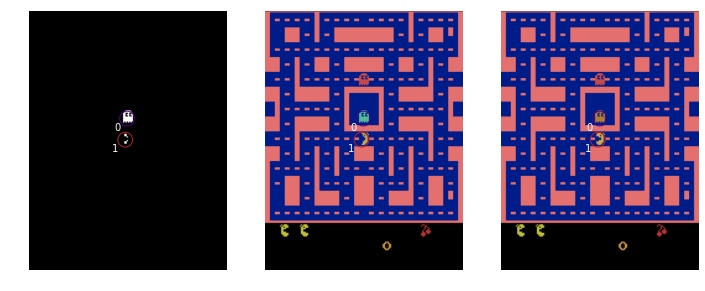


1



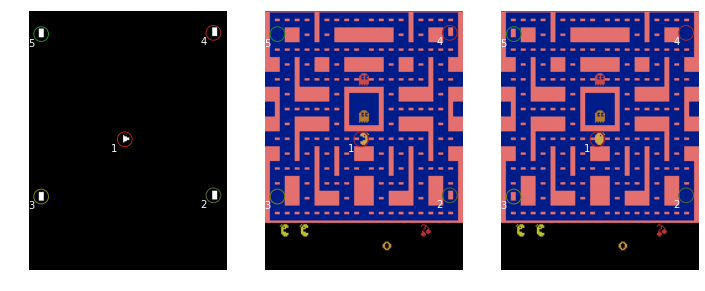


2



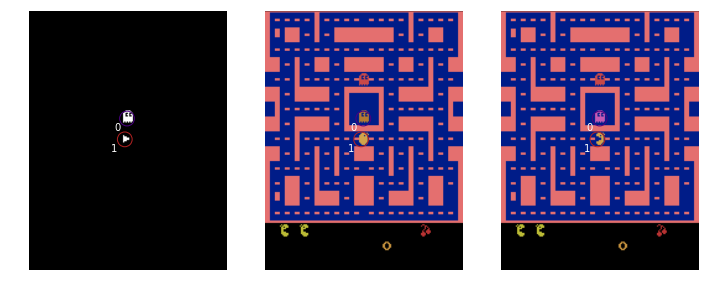


3



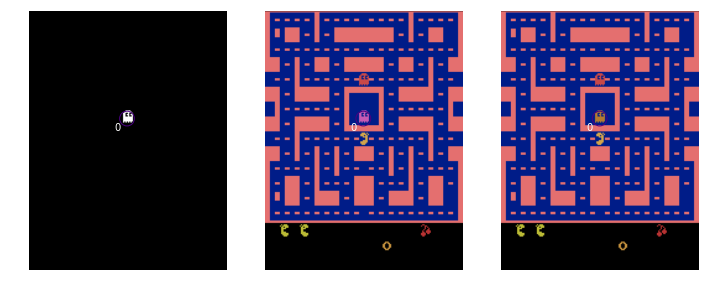


4



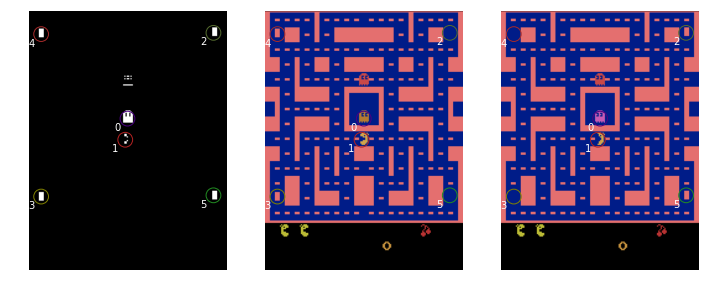


5



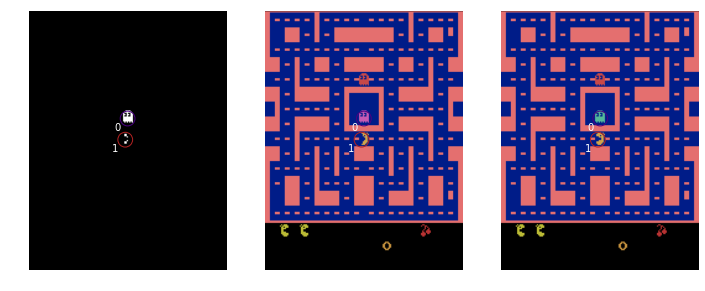


6



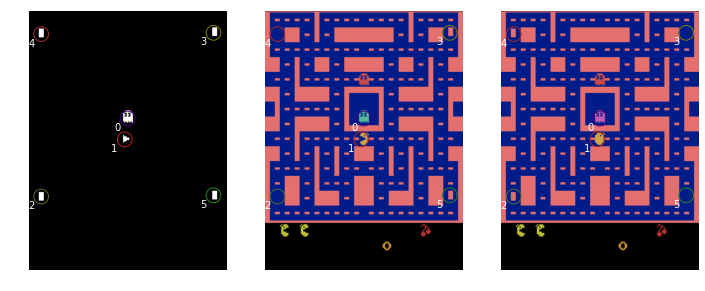


7



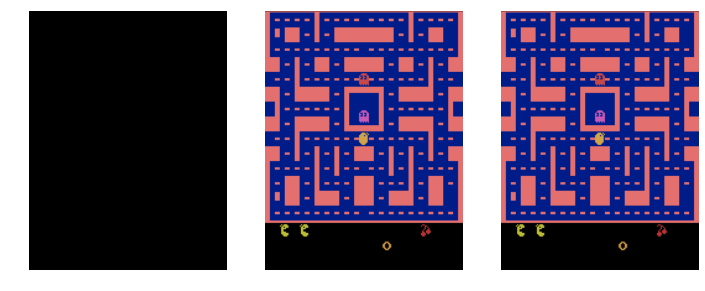


8



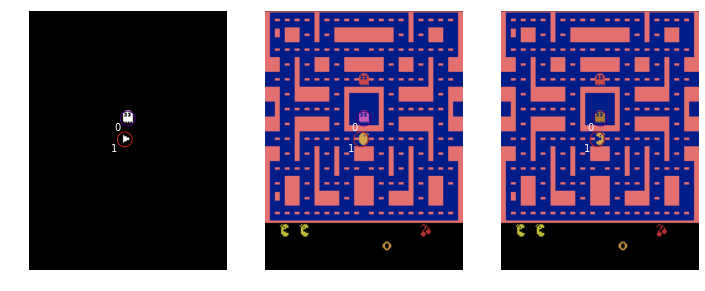


9



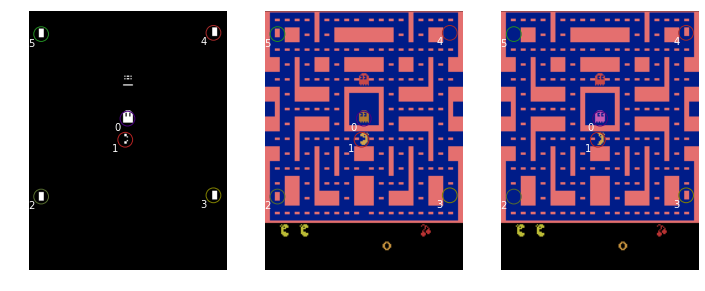


10



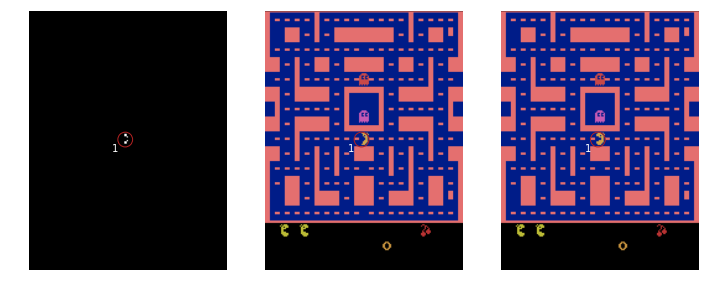


11



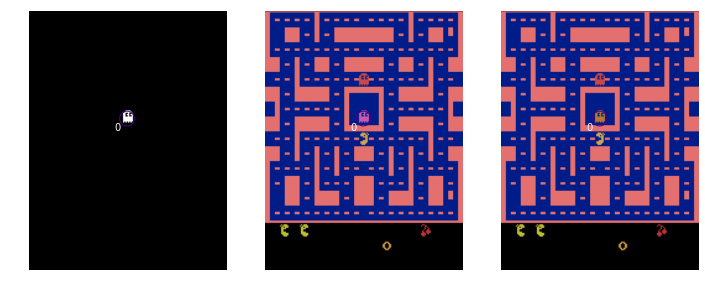


12



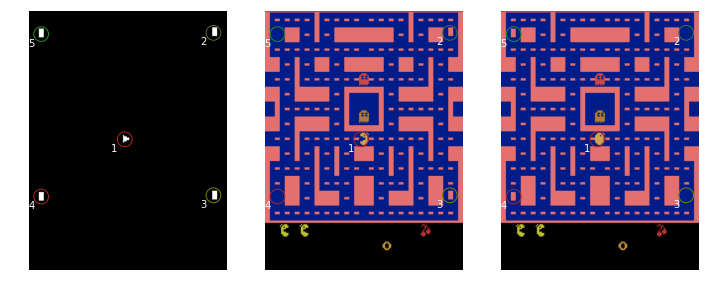


13



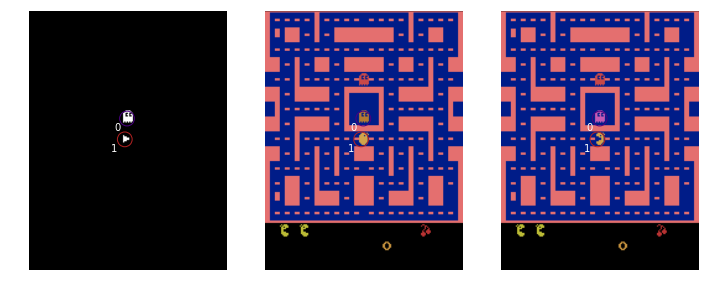


14



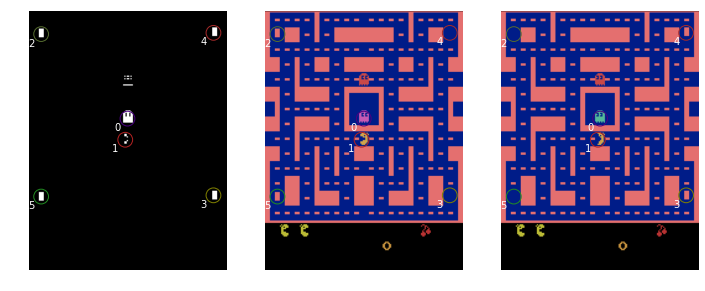


15



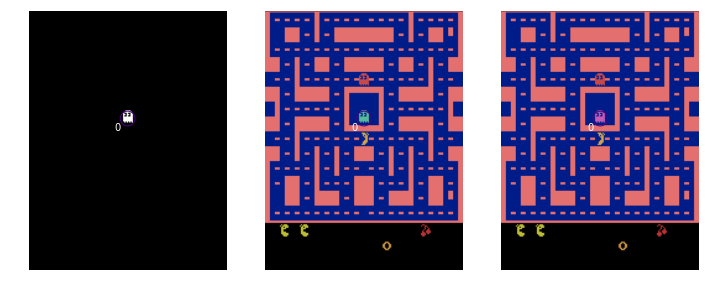


16



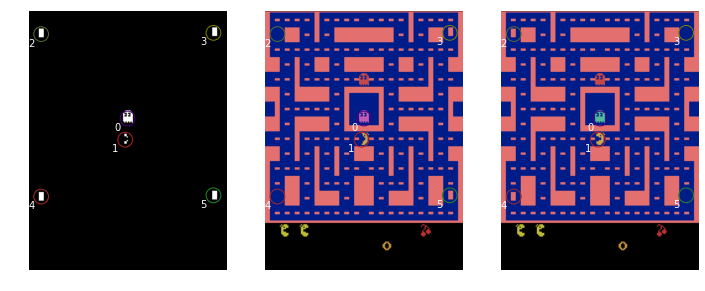


17



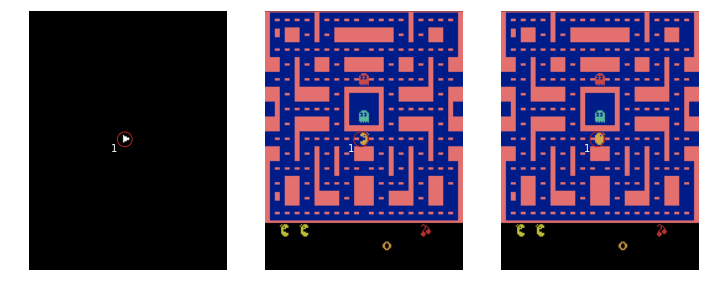


18



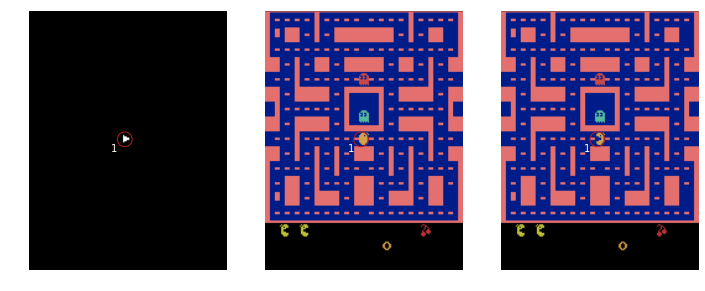


19



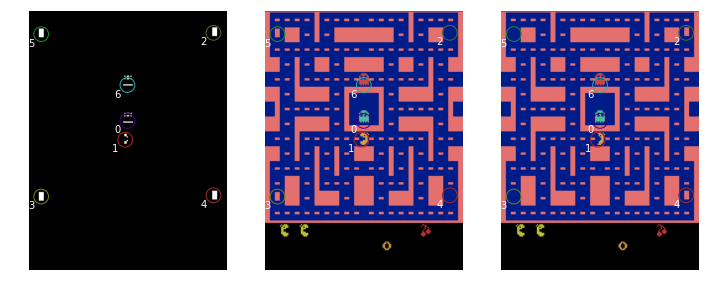

In [53]:
for i, thresh in enumerate(frame_thresh):
    print '\n' + str(i) + '\n'
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(131)
    plt.axis('off')
    plt.imshow(thresh,cmap='gray')
    movers_cur_frame = []
    for m in mt.movers:
        cur_frame_pos = filter(lambda p: p[0]==i, m.trajectory)
        if len(cur_frame_pos) > 0:
            movers_cur_frame.append((m.id, cur_frame_pos[0][1]))
    for data in movers_cur_frame:
        m_id = data[0]
        pos = data[1]
        ax.add_patch(patches.Circle((pos.x, pos.y),
                                    radius=6,
                                    color=box_colors[m_id],
                                    fill=False)
            )
        plt.text(pos.x-10, pos.y+10, str(m_id),color='w')
        
    ax = fig.add_subplot(132)
    plt.axis('off')
    plt.imshow(fp[i].s0)
    for data in movers_cur_frame:
        m_id = data[0]
        pos = data[1]
        ax.add_patch(patches.Circle((pos.x, pos.y),
                                    radius=6,
                                    color=box_colors[m_id],
                                    fill=False)
            )
        plt.text(pos.x-10, pos.y+10, str(m_id),color='w')

    
    ax = fig.add_subplot(133)
    plt.axis('off')
    plt.imshow(fp[i].s1)
    for data in movers_cur_frame:
        m_id = data[0]
        pos = data[1]
        ax.add_patch(patches.Circle((pos.x, pos.y),
                                    radius=6,
                                    color=box_colors[m_id],
                                    fill=False)
            )
        plt.text(pos.x-10, pos.y+10, str(m_id),color='w')

    plt.show()

In [103]:
frame_boxes = [f.boxes for f in fp]
centers = [[b.center  for b in boxes] for boxes in frame_boxes]

pixel_frames = []

for boxes in frame_boxes:
    darkFrame = np.zeros((210,160,3))

    for b in boxes:
        darkFrame[int(b.ll.y):int(b.ur.y), int(b.ll.x):int(b.ur.x), :] = b.img
        
    pixel_frames.append(darkFrame)

In [539]:
for obs in t[t['particle']==1].iterrows():
    print obs[1].frame
    print 

0.0
[0.0, (85.25736568457539, 72.623570190641246)]
1.0
[1.0, (85.348808122424956, 72.791200706297815)]
2.0
[2.0, (82.463022866703852, 70.657445621862806)]
3.0
[3.0, (81.084621872364352, 72.478633680067475)]
4.0
[4.0, (77.0, 72.458223735107538)]
5.0
[5.0, (75.125279475331638, 71.792890147562971)]
8.0
[8.0, (73.80657999469355, 72.6164322985761)]
9.0
[9.0, (73.604567639745838, 78.672345519845294)]


//anaconda/envs/tensorflow/lib/python2.7/site-packages/pandas/core/common.py:277: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
//anaconda/envs/tensorflow/lib/python2.7/site-packages/pandas/core/common.py:277: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
//anaconda/envs/tensorflow/lib/python2.7/site-packages/pandas/core/common.py:277: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
//anaconda/envs/tensorflow/lib/python2.7/site-packages/pandas/core/common.py:277: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  return -res
//anaconda/envs/tensorflow/lib/python2.7/site-packages/pandas/core/common.py

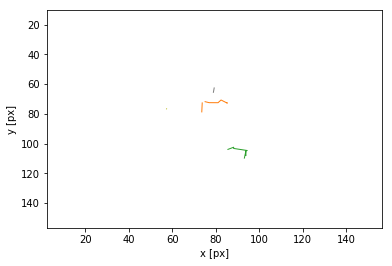

In [524]:
tp.plot_traj(t)

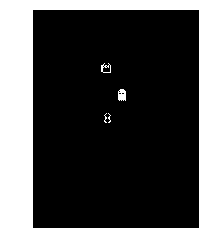

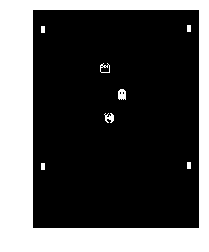

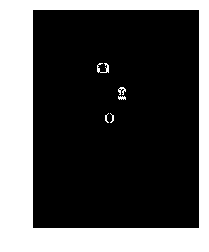

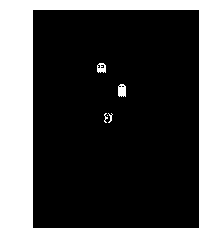

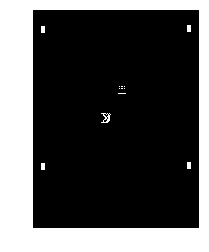

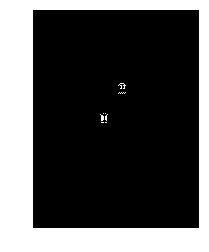

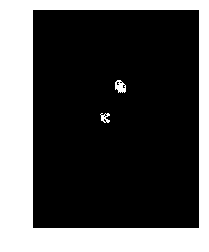

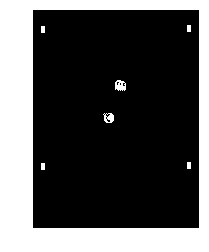

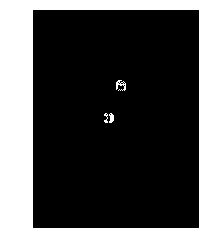

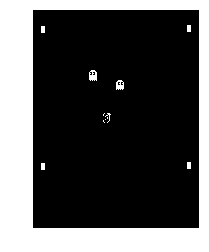

In [405]:
for thresh in frame_thresh:
    plt.figure()
    plt.axis('off')
    plt.imshow(thresh,cmap='gray')

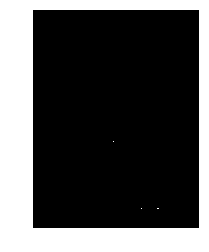

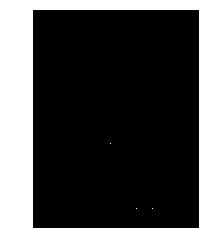

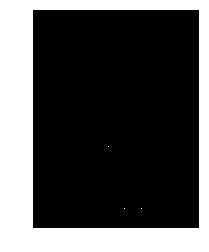

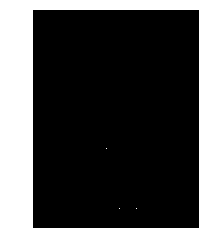

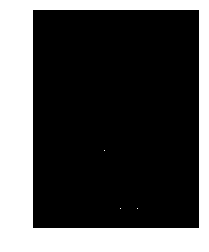

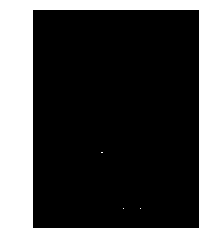

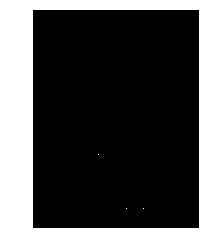

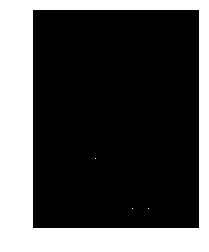

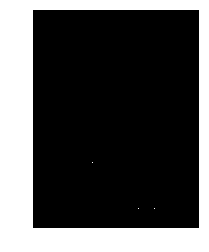

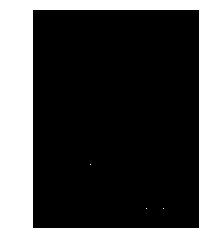

In [233]:
frame_boxes = [f.boxes for f in fp]
centers = [[b.center  for b in boxes] for boxes in frame_boxes]

for frame_centers in centers:
    plt.figure()
    plt.axis('off')
    darkFrame = np.zeros((210,160,3))

    for c in frame_centers:
        darkFrame[int(c.y), int(c.x), :] = 1

    plt.imshow(darkFrame)

In [244]:
dist_eps = 1

g = nx.DiGraph()
for frame_num, frame_centers in enumerate(centers):
    for center in frame_centers:

        cur_node = (frame_num, (center.x, center.y))
        g.add_node(cur_node)
        
        prev_frame_nodes = [n for n in g.nodes() if n[0] == frame_num-1]
        for prev_node in prev_frame_nodes:
            prev_node_center = Point(*prev_node[1])
            dist = center.sq_dist(prev_node_center)
            g.add_edge(prev_node, cur_node, weight = 1./(dist+dist_eps)) 

In [245]:
nums_to_nodes = {}
for i, node in enumerate(g.nodes()):
    g.node[node]['num'] = i
    nums_to_nodes[i] = node
    g.node[node]['quantities'] = {j: float(i==j) for j in range(g.number_of_nodes())}
    g.node[node]['new_quantities'] = g.node[node]['quantities'].copy()

In [246]:
def flow_step(g_in, step_size=10):
    g = g_in.copy()
    for node in g.nodes():
        predecessors = g.predecessors(node)
        for pred in predecessors:
            weight = g[pred][node]['weight']
            pred_num = g.node[pred]['num']
            pred_q = g.node[pred]['quantities']
            num_suc = len(g.successors(pred))
            for k, v in pred_q.iteritems():
                g.node[node]['new_quantities'][k] += step_size * v * (weight / num_suc)
    
    for node in g.nodes():
         g.node[node]['quantities'] =  g.node[node]['new_quantities'].copy()
    # re-normalize
    
    for level in range(len(centers)):
        same_level_nodes = [g.node[n]['num'] for n in g.nodes() if n[0] == level]   
        for node in g.nodes():
            total_quantity = sum([g.node[node]['quantities'][num] for num in same_level_nodes])
            if total_quantity > 0:
                for num in same_level_nodes:
                    g.node[node]['quantities'][num] /= total_quantity
    
    return g

In [252]:
g2 = g.copy()

for i in range(100):
    g2 = flow_step(g2)
    
    
for node in nx.topological_sort(g2):
    print node
    q = {nums_to_nodes[k]:v for k, v in g2.node[node]['quantities'].iteritems() if v > 0}
    for k, v in q.iteritems():
        if k[0] == node[0]-1:
            print k, ': ', v
    print ''

(0, (104.0, 191.0))

(0, (77.0, 126.0))

(0, (120.0, 191.0))

(1, (99.5, 191.5))
(0, (120.0, 191.0)) :  0.0483266664082
(0, (77.0, 126.0)) :  0.00424589679855
(0, (104.0, 191.0)) :  0.947427436793

(1, (115.5, 191.5))
(0, (120.0, 191.0)) :  0.858536679095
(0, (77.0, 126.0)) :  0.00319711415962
(0, (104.0, 191.0)) :  0.138266206746

(1, (74.5, 128.5))
(0, (120.0, 191.0)) :  0.00224704480097
(0, (77.0, 126.0)) :  0.994941503541
(0, (104.0, 191.0)) :  0.00281145165836

(2, (104.5, 191.5))
(1, (99.5, 191.5)) :  0.820712442605
(1, (115.5, 191.5)) :  0.174905930391
(1, (74.5, 128.5)) :  0.00438162700364

(2, (88.5, 191.5))
(1, (99.5, 191.5)) :  0.835835285607
(1, (115.5, 191.5)) :  0.139687540882
(1, (74.5, 128.5)) :  0.0244771735103

(2, (72.0, 131.0))
(1, (99.5, 191.5)) :  0.00303935047174
(1, (115.5, 191.5)) :  0.00241763405221
(1, (74.5, 128.5)) :  0.994543015476

(3, (83.0, 191.0))
(2, (104.5, 191.5)) :  0.063136034236
(2, (88.5, 191.5)) :  0.929001646616
(2, (72.0, 131.0)) :  0.0078623

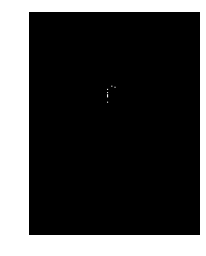

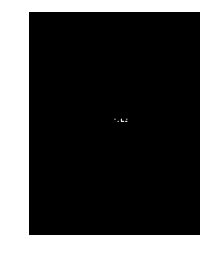

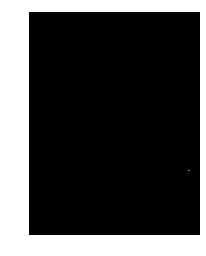

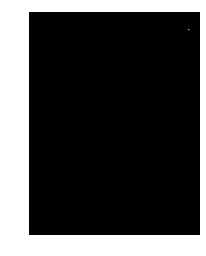

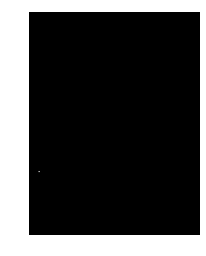

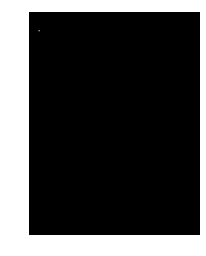

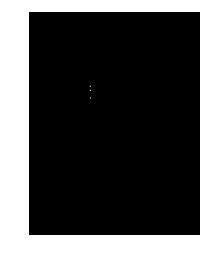

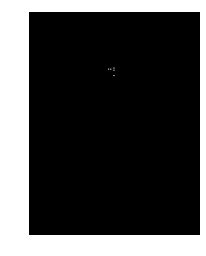

In [107]:
for m in mt.movers:
    plt.figure()
    plt.axis('off')
    darkFrame = np.zeros((210,160,3))

    for p in m.trajectory:
        darkFrame[int(p[1].y), int(p[1].x), :] = 1

    plt.imshow(darkFrame)

0.368421052632


"\nLR3 = LogisticRegression(penalty='l1', C=0.5)\nLR3.fit(features[400:], action_targets[400:])\nprint LR3.score(features[400:], action_targets[400:])\nplt.matshow(LR3.coef_,cmap='gray')\nplt.colorbar()\n"

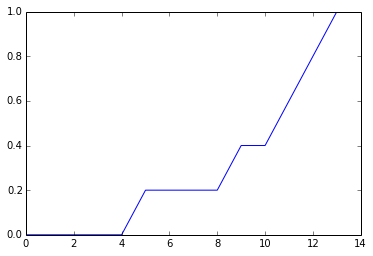

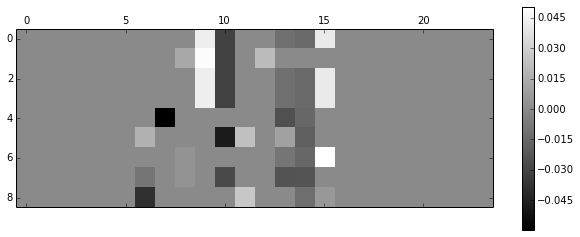

In [102]:
# messing around
test = mt.movers
traj = [t.trajectory for t in test]

disp = []
acc = []
for tt in traj:
    t = [tup[1] for tup in tt]
    disp_pts = [p2 - p1 for p2, p1 in zip(t[1:],t[:-1])]
    acc_pts = [p2 - p1 for p2, p1 in zip(disp_pts[1:],disp_pts[:-1])]
    disp_x = [p.x for p in disp_pts]
    disp_y = [p.y for p in disp_pts]
    acc_x = [p.x for p in acc_pts]
    acc_y = [p.y for p in acc_pts]

    disp.append(disp_x)
    disp.append(disp_y)
    acc.append(acc_x)
    acc.append(acc_y)

disp_features = np.array([np.concatenate([np.zeros(len(mt.action_hist[:-1])-len(d)), np.array(d)]) for d in disp]).T

acc_features = np.array([np.concatenate([np.zeros(len(mt.action_hist[:-1])-len(d)), np.array(d)]) for d in acc]).T

action_targets = np.array(mt.action_hist[1:])
features = disp_features


LR2 = LogisticRegression(penalty='l1', C=0.1)
LR2.fit(features, action_targets)
print LR2.score(features, action_targets)
#plt.matshow(LR2.coef_,cmap='gray')
plt.plot([LR2.score(features[i:i+5], action_targets[i:i+5]) for i in range(action_targets.shape[0]-5)])

plt.matshow(LR2.coef_,cmap='gray')
plt.colorbar()

'''
LR3 = LogisticRegression(penalty='l1', C=0.5)
LR3.fit(features[400:], action_targets[400:])
print LR3.score(features[400:], action_targets[400:])
plt.matshow(LR3.coef_,cmap='gray')
plt.colorbar()
'''

In [4]:
def movers_mask(s, s1, shape):
    movers = find_movers(s, s1)
    mask = np.zeros(shape)
    for m in movers:
        mask[m[0]:m[1], m[2]:m[3]] = 1
    return mask

In [5]:
def init_env(env,n_steps):
    env.reset()
    # e.g. nothing happens in first 100 steps of ms pacman
    for i in range(n_steps):
        s,r,d,info = env.step(env.action_space.sample()) # take a random action
    return s,info


def dump_mover_images(num_steps, env, img_dir, debug=False):
    
    run_identifier = str(random.randint(0,1e6))
    
    s, info = init_pacman(env)
    
    for i in range(num_steps):
        
        if info['ale.lives'] == 0:
            s, info = init_pacman(env)
    
        s1,r,d,info = env.step(env.action_space.sample())
        
        #s = s[:160,:]
        #s1 = s1[:160,:]
        
        movers, thresh_dilated = find_movers(s, s1, force_square=True)
        
        for m in movers:
            m_image = Image.fromarray(s[m[0]:m[1], m[2]:m[3]])
            m_image.save(img_dir + run_identifier + 'img' + str(i) + '.jpg')
            
            if debug:
                # figures for debugging
                fig = plt.figure(figsize=(10,10))
                fig.add_subplot(121)
                plt.axis('off')
                plt.imshow(s[m[0]:m[1], m[2]:m[3]])
                ax = fig.add_subplot(122)
                plt.axis('off')
                plt.imshow(thresh_dilated)
                ax.add_patch(patches.Rectangle((m[2]-1,m[0]-1),m[3]-m[2],m[1]-m[0],color='g',fill=False))

                plt.show()
                pdb.set_trace()
        s = s1

In [27]:
class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __repr__(self):
        return str((self.x, self.y))
    
    def sq_dist(self, p):
        return (self.x-p.x)**2 + (self.y-p.y)**2

class Mover():
    def __init__(self, mover_id, game_id, img_dir):
        self.trajectory = []
        self.id = mover_id
        self.img_dir = img_dir + 'mover' + str(self.id) + '/'
        os.mkdir(self.img_dir)
        self.features = None
        
    def add_observation(self, location, img):
        self.trajectory.append(location)
        img_for_save = Image.fromarray(img)
        img_for_save.save(self.img_dir + str(random.randint(0,1e6)) + '.jpg')

class MoverTracker():
    def __init__(self, game_id, img_dir, hyperparams):
        self.game_id = game_id
        self.n_movers = 0
        self.movers = []
        self.action_hist = []
        self.reward_hist = []
        self.img_dir = img_dir + str(game_id) + '/'
        os.mkdir(self.img_dir)
        self.hyperparams = hyperparams
        
    def process_frame_pair(self, frame_pair):
        self.action_hist.append(frame_pair.a)
        self.reward_hist.append(frame_pair.r)
        
        boxes = frame_pair.find_movers(force_square=self.hyperparams['force_square'])[0]
        if self.n_movers == 0:
            if len(boxes) > 1:
                # if we only found one mover, hard to track which is which
                # so wait until we see two
                for i, box in enumerate(boxes):
                    m = Mover(mover_id=i, game_id=self.game_id, img_dir=self.img_dir)
                    img = frame_pair.s0[box[0].y:box[1].y, box[0].x:box[1].x]
                    center = Point((box[0].x + box[1].x)/2, (box[0].y + box[1].y)/2)

                    m.add_observation(center, img)
                    self.movers.append(m)
                    self.n_movers += 1
        else:
            cur_positions = m.trajectory[-1] for m in self.movers
            internal_dists = self.get_internal_dists(cur_positions)
            
            box_assignments = {}
            for i, box in enumerate(boxes):
                # this should be the other way around --
                # rather than matching new points to old points,
                # we should try to account for all the old points,
                # then deal with any new points remaining
                img = frame_pair.s0[box[0].y:box[1].y, box[0].x:box[1].x]
                center = Point((box[0].x + box[1].x)/2, (box[0].y + box[1].y)/2)
                
                box_id = self.identify_mover(center, cur_positions, internal_dists)
                
                if box_id >= self.n_movers:
                    # new mover
                    m = Mover(mover_id=box_id, game_id=self.game_id, img_dir=self.img_dir)
                    m.add_observation(center, img)
                    self.movers.append(m)
                    self.n_movers += 1
                else:
                    box_assignments{box_id} = i
                    #self.movers[box_id].add_observation(center, img)
            for m in box_assignments:
                

            
    def identify_mover(self, center, cur_positions, internal_dists):
        dists = [center.sq_dist(p) for p in cur_positions]
        ind_min = np.argmin(dists)
        if dists[ind_min] > np.percentile(internal_dists,0.33):
            # above test is crude, refine later
            # new mover
            return self.n_movers
        else:
            return ind_min, dists[ind_min]
        
    def get_internal_dists(self, cur_positions):
        internal_dists = []
        for i, p1 in enumerate(cur_positions):
            for j, p2 in enumerate(cur_positions[:i]):
                internal_dists.append(p1.sq_dist(p2))
        return internal_dists
    
class FramePair():
    def __init__(self, s0, s1, a, r):
        self.s0 = s0
        self.s1 = s1
        self.a = a
        self.r = r
        
    def find_movers(self, force_square=True):
        movers = []
        frame_diff = self.s1 - self.s0
        fd_grey = cv2.cvtColor(frame_diff, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(fd_grey,1,255,cv2.THRESH_BINARY)[1]
        thresh_dilated = cv2.dilate(thresh,None,iterations=1)
        (cnts, _) = cv2.findContours(thresh_dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

        for i, c in enumerate(cnts):
            if cv2.contourArea(c) > 41:
                (x, y, w, h) = cv2.boundingRect(c)
                if force_square:
                    if w < h:
                        deltaW = h - w
                        w = h
                        x = x - int(deltaW/2)
                    elif h < w:
                        deltaH = w - h
                        h = w
                        y = y - int(deltaH/2)
                if (x >= 0) and (y >= 0):
                    point0 = Point(x,y)
                    point1 = Point(x+w, y+h)
                    movers.append((point0, point1))
        return movers, thresh_dilated

In [28]:
def play(num_steps, env, img_dir, init_steps, debug=False, hyperparams={'force_square':True}):
    
    game_id = str(random.randint(0,1e6))
    
    mover_tracker = MoverTracker(game_id, img_dir, hyperparams)
    
    s0, info = init_env(env, init_steps)
    
    for i in range(num_steps):
        
        if info['ale.lives'] == 0:
            s0, info = init_env(env, init_steps)
    
        a = env.action_space.sample()
        s1,r,d,info = env.step(a)
        
        #s0 = s0[:160,:]
        #s1 = s1[:160,:]

        frame_pair = FramePair(s0, s1, a, r)
        
        mover_tracker.process_frame_pair(frame_pair)
        
        s0 = s1
    
    return mover_tracker

In [65]:
num_steps = 200
img_dir = 'img/'

dump_mover_images(num_steps, env, img_dir)

IndexError: tuple index out of range

In [ ]:
a = np.random.randint(0,9)

s,r,d,info = env.step(a)

a = np.random.randint(0,9)

s1,r,d,info = env.step(a)

a = np.random.randint(0,9)

s2,r,d,info = env.step(a)

plt.imshow(s1[:160,:])

frame_diff = s1[:160,:]-s[:160,:]
frame_diff_2 = s2[:160,:]-s1[:160,:]

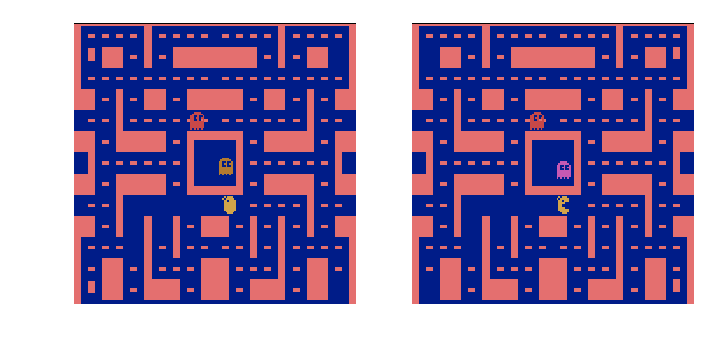

2
107.0


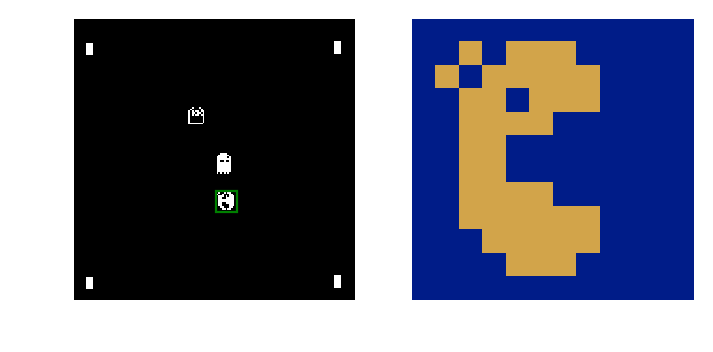

3
112.5


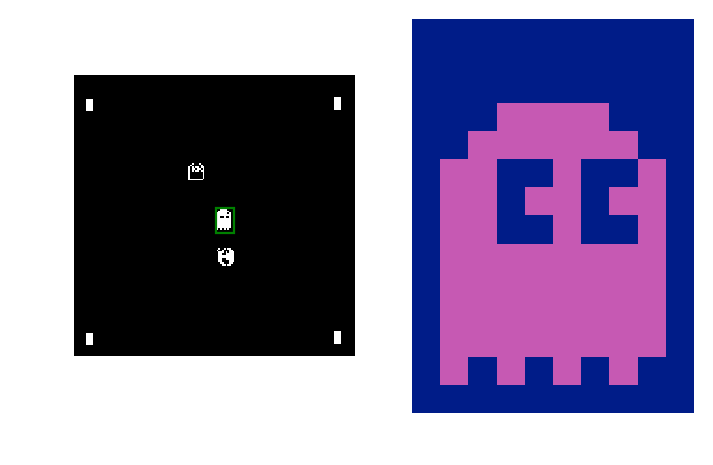

KeyboardInterrupt: 

In [35]:


test=cv2.cvtColor(frame_diff, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(test,1,255,cv2.THRESH_BINARY)[1]
thresh_dilated = cv2.dilate(thresh,None,iterations=1)
(cnts, _) = cv2.findContours(thresh_dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
thresh = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

fig = plt.figure(figsize=(5,5),dpi=160)
fig.add_subplot(121)
plt.axis('off')
plt.imshow(s1[:160,:])
fig.add_subplot(122)
plt.imshow(s[:160,:])
plt.axis('off')
plt.show()

objects = []
movers = find_movers(s, s1)

for i, c in enumerate(cnts):
    if cv2.contourArea(c) > 41:
        (x, y, w, h) = cv2.boundingRect(c)
        fig = plt.figure(figsize=(5,5),dpi=160)
        ax = fig.add_subplot(121)
        plt.axis('off')
        #plt.imshow(thresh[y:y+h,x:x+w])
        plt.imshow(thresh)
        print i
        print cv2.contourArea(c)
        plt.axis([1, 160, 160, 1])
        ax.add_patch(patches.Rectangle((x,y),w,h,color='g',fill=False))
        ax = fig.add_subplot(122)
        plt.axis('off')
        plt.imshow(s[y:y+h,x:x+w])
        objects.append(s[y:y+h,x:x+w])
        plt.show()

In [ ]:
plt.imshow(s[y:y+h,x:x+w])
plt.axis('off')

In [141]:
sess = tf.Session()

net = DynNetwork()

sess.run(tf.variables_initializer(tf.global_variables()))

In [ ]:
class DynNetwork():
    def __init__(self):
        #self.scalarInputFrame0 =  tf.placeholder(shape=[None,21168],dtype=tf.float32)
        #self.imageInFrame0 = tf.reshape(self.scalarInputFrame0,shape=[-1,84,84,3])

        #self.scalarInputFrame1 =  tf.placeholder(shape=[None,21168],dtype=tf.float32)
        #self.imageInFrame1 = tf.reshape(self.scalarInputFrame1,shape=[-1,84,84,3])
        
        self.imageInFrame0 = tf.placeholder(shape=[1,160,160,3],dtype=tf.float32,name='imageInFrame0')
        self.imageInFrame1 = tf.placeholder(shape=[1,160,160,3],dtype=tf.float32,name='imageInFrame1')

        #self.action = tf.placeholder(shape=[1],dtype=tf.int32)
        
        with tf.variable_scope('conv1') as scope:
            kernel = tf.Variable(tf.truncated_normal([4, 4, 3, 16], dtype=tf.float32,\
                                               stddev=1e-1))
            biases = tf.Variable(tf.constant(0.0, shape=[16], dtype=tf.float32),
                           trainable=True)

            conv_F0 = tf.nn.conv2d(self.imageInFrame0, kernel, [1, 2, 2, 1], padding='SAME')
            conv_F1 = tf.nn.conv2d(self.imageInFrame1, kernel, [1, 2, 2, 1], padding='SAME')

            bias_F0 = tf.nn.bias_add(conv_F0, biases)
            bias_F1 = tf.nn.bias_add(conv_F1, biases)

            self.conv1_F0 = tf.nn.relu(bias_F0,name=scope.name)
            self.conv1_F1 = tf.nn.relu(bias_F1,name=scope.name)

        with tf.variable_scope('conv2') as scope:
            kernel = tf.Variable(tf.truncated_normal([4, 4, 16, 8], dtype=tf.float32,\
                                               stddev=1e-1))
            biases = tf.Variable(tf.constant(0.0, shape=[8], dtype=tf.float32),
                           trainable=True)

            conv_F0 = tf.nn.conv2d(self.conv1_F0, kernel, [1, 2, 2, 1], padding='SAME')
            conv_F1 = tf.nn.conv2d(self.conv1_F1, kernel, [1, 2, 2, 1], padding='SAME')

            bias_F0 = tf.nn.bias_add(conv_F0, biases)
            bias_F1 = tf.nn.bias_add(conv_F1, biases)

            self.conv2_F0 = tf.nn.relu(bias_F0,name=scope.name)
            self.conv2_F1 = tf.nn.relu(bias_F1,name=scope.name)
        '''
        with tf.variable_scope('conv3') as scope:
            kernel = tf.Variable(tf.truncated_normal([3, 3, 64, 8], dtype=tf.float32,\
                                               stddev=1e-1))
            biases = tf.Variable(tf.constant(0.0, shape=[8], dtype=tf.float32),
                           trainable=True)

            conv_F0 = tf.nn.conv2d(self.conv2_F0, kernel, [1, 1, 1, 1], padding='SAME')
            conv_F1 = tf.nn.conv2d(self.conv2_F1, kernel, [1, 1, 1, 1], padding='SAME')

            bias_F0 = tf.nn.bias_add(conv_F0, biases)
            bias_F1 = tf.nn.bias_add(conv_F1, biases)

            self.conv3_F0 = tf.nn.relu(bias_F0,name=scope.name)
            self.conv3_F1 = tf.nn.relu(bias_F1,name=scope.name)
        
        '''
        with tf.variable_scope('conv_diff') as scope:
            nonzero_weightsF0 = tf.Variable(tf.truncated_normal([2, 2, 8], dtype=tf.float32,\
                                                                    stddev=1e-1), name='nonzero_weightsF0')
            nonzero_weightsF1 = tf.Variable(tf.truncated_normal([2, 2, 8], dtype=tf.float32,\
                                                                    stddev=1e-1), name='nonzero_weightsF1')
            weightsF0 = tf.matrix_set_diag(tf.zeros([2,2,8,8]),nonzero_weightsF0)
            weightsF1 = tf.matrix_set_diag(tf.zeros([2,2,8,8]),nonzero_weightsF1)
            kernel = tf.concat([weightsF0,weightsF1],2)
            
            biases = tf.Variable(tf.constant(0.0, shape=[8], dtype=tf.float32),
                           trainable=True)
            conv2_both = tf.concat([self.conv2_F0, self.conv2_F1],3)
            
            conv = tf.nn.conv2d(conv2_both, kernel, [1, 2, 2, 1], padding='SAME')
            
            bias = tf.nn.bias_add(conv, biases)
            self.conv_diff = tf.nn.relu(bias, name=scope.name)
        
        #self.cdf = slim.flatten(self.conv_diff)
        #self.fc = slim.fully_connected(self.cdf, 3)
        #self.logits = tf.concat([self.fc, [[1]]],1)
        
        self.movers_mask = tf.placeholder(shape=[1,160,160,1],dtype=tf.float32)
        #self.frame_diff_scalar = tf.reshape(self.frame_diff,[1,21168])
        
        nonzero_weightsOut = tf.Variable(tf.truncated_normal([8,8,8,1], dtype=tf.float32,\
                                                                stddev=1e-1), name='nonzero_weightsOut')

        biases = tf.Variable(tf.constant(0.0, shape=[1,160,160,1], dtype=tf.float32),
                           trainable=True)
        
        weightsProd = tf.tensordot(self.conv_diff, nonzero_weightsOut, [[3],[0]])

        
        channels = tf.unstack(weightsProd,axis=5)
        screen_channels = []
        for ch in channels:
            full_cols=[tf.reshape(t,[160,8]) for t in tf.unstack(ch,axis=1)]
            screen_channels.append(tf.concat(full_cols,1))
        weightsProd_screen = tf.stack(screen_channels,axis=2)
        
        bias = tf.add(weightsProd_screen, biases)
            
        self.out = tf.nn.relu(bias, name=scope.name)

        #self.loss = tf.reduce_sum(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=self.action, logits=self.logits))
        
        self.loss = tf.reduce_sum(tf.square(self.movers_mask - self.out))
        
        self.trainer = tf.train.AdamOptimizer(learning_rate=0.001)
        self.update_model = self.trainer.minimize(self.loss)
        

In [ ]:
num_steps = 50000

env.reset()

# nothing happens in first 100 steps of ms pacman
for i in range(100):
    s,r,d,info = env.step(env.action_space.sample()) # take a random action

losses = []

for i in range(num_steps):
    
    if info['ale.lives'] == 0:
        s = env.reset()
        for i in range(100):
            s,r,d,info = env.step(env.action_space.sample()) # take a random action

    a = np.random.randint(0,9)
    s1,r,d,info = env.step(a)

    s = s[:160,:]
    s1 = s1[:160,:]
    
    mask = np.expand_dims(movers_mask(s, s1, s.shape[:2]),2)
    [dummy, loss] = sess.run([net.update_model, net.loss], \
                             feed_dict={net.imageInFrame0:[s],\
                                        net.imageInFrame1:[s1],\
                                        net.movers_mask: [mask]})
    losses.append(loss)

    if i % 500 == 0:
        print i
        print losses[i]
        
        out = sess.run(tf.reshape(net.out,[160,160,1]), \
                             feed_dict={net.imageInFrame0:[s],\
                                        net.imageInFrame1:[s1],\
                                        net.movers_mask: [mask]})
        out_im = np.reshape(out,s.shape[:2])
        mask_im = np.reshape(mask,s.shape[:2])
        plt.figure(figsize=(10,10))
        plt.subplot(121)
        plt.axis('off')
        plt.imshow(out_im,cmap='gray')
        plt.subplot(122)
        plt.axis('off')
        plt.imshow(mask_im,cmap='gray')
        
        plt.show()
        pdb.set_trace()
        
    s = s1
    

In [ ]:
sess.close()

In [ ]:
plt.plot(losses[100:],'o')

In [6]:
def play_centers(env, num_steps, debug=False):
    s, info = init_pacman(env)

    centers = []
    
    for step in range(num_steps):
        
        if info['ale.lives'] == 0:
            s, info = init_pacman(env)
    
        s1,r,d,info = env.step(env.action_space.sample())
        
        s = s[:160,:]
        s1 = s1[:160,:]
        
        movers, thresh_dilated = find_movers(s, s1, force_square=False)
        
        if debug:
            fig = plt.figure(figsize=(10,10))
            fig.add_subplot(121)
            plt.imshow(s)
            fig.add_subplot(122)
            plt.imshow(s,alpha=0.5)
            plt.imshow(s1,alpha=0.5)

        curCenters = []
        
        for i, m in enumerate(movers):
            if debug:
                fig = plt.figure(figsize=(10,10))
                fig.add_subplot(121)
                plt.axis('off')
                plt.imshow(s[m[0]:m[1], m[2]:m[3]])
                ax = fig.add_subplot(122)
                plt.axis('off')
                plt.imshow(thresh_dilated)
                ax.add_patch(patches.Rectangle((m[2]-1,m[0]-1),m[3]-m[2],m[1]-m[0],color='g',fill=False))
                print 'Mover ' + str(i) + '\n' + 'Center: ' + str( (centerX, centerY) )
                plt.show()
            
            centerX = m[2] + (m[3]-m[2])/2; centerY = m[0] + (m[1]-m[0])/2
            curCenters.append((centerX,centerY))


        if debug:
            fig = plt.figure(figsize=(10,10))
            fig.add_subplot(121)
            plt.axis('off')
            darkFrame = np.zeros((160,160,3))
            frame_colors = {0: [1,0,0], 1:[0,1,0]}
            for frame_num, frame in enumerate(centers[-2:]):
                for center in frame:
                    darkFrame[int(center[1]),int(center[0]),:] = frame_colors[frame_num]
            plt.imshow(darkFrame)

            plt.show()
            pdb.set_trace()
        
        
        centers.append(curCenters)
        s = s1
    return centers